Xavg
(2,)
[2.0144154  1.02550985]
(2, 2)
[[-0.99900893 -0.43464038]
 [-1.72849172  0.25120723]]
pca
(2, 2)
[[-0.99900893 -0.43464038]
 [-1.72849172  0.25120723]]
pc
[2.0144154  1.01540647]
[ 1.02550985 -0.70298187]
[2.0144154  1.57977502]
[1.02550985 1.27671709]
pca
[ 2.0144154  -0.99900893]
[ 1.02550985 -1.72849172]
[ 2.0144154  -0.43464038]
[1.02550985 0.25120723]


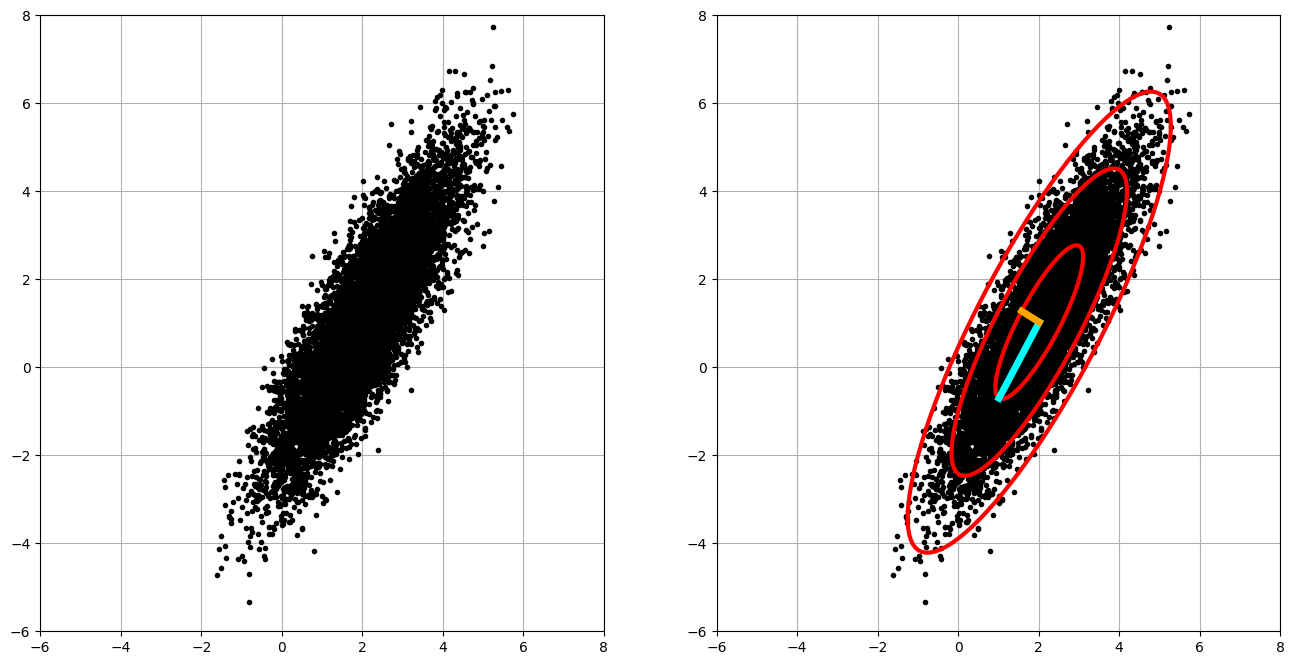

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
if True:
    U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)
else:
    U, S, VT = np.linalg.svd(B,full_matrices=False)
    U = U / np.sqrt(nPoints)
    VT = VT / np.sqrt(nPoints)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S)
print("Xavg")
print(Xavg.shape)
print(Xavg)
print(Xstd.shape)
print(Xstd)
# pca = Xavg + np.matmul(U, np.diag(S))
pca = np.matmul(U, np.diag(S))
print("pca")
print(pca.shape)
print(pca)

circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = Xstd @ circle


ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]

print("pc")
print(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]))
print(np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]))

print(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]))
print(np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]))

print("pca")
x1 = np.array([Xavg[0], pca[0, 0]])
y1 = np.array([Xavg[1], pca[1, 0]])

x2 = np.array([Xavg[0], pca[0, 1]])
y2 = np.array([Xavg[1], pca[1, 1]])
print(x1)
print(y1)
print(x2)
print(y2)

ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='orange',linewidth=5)

plt.show()



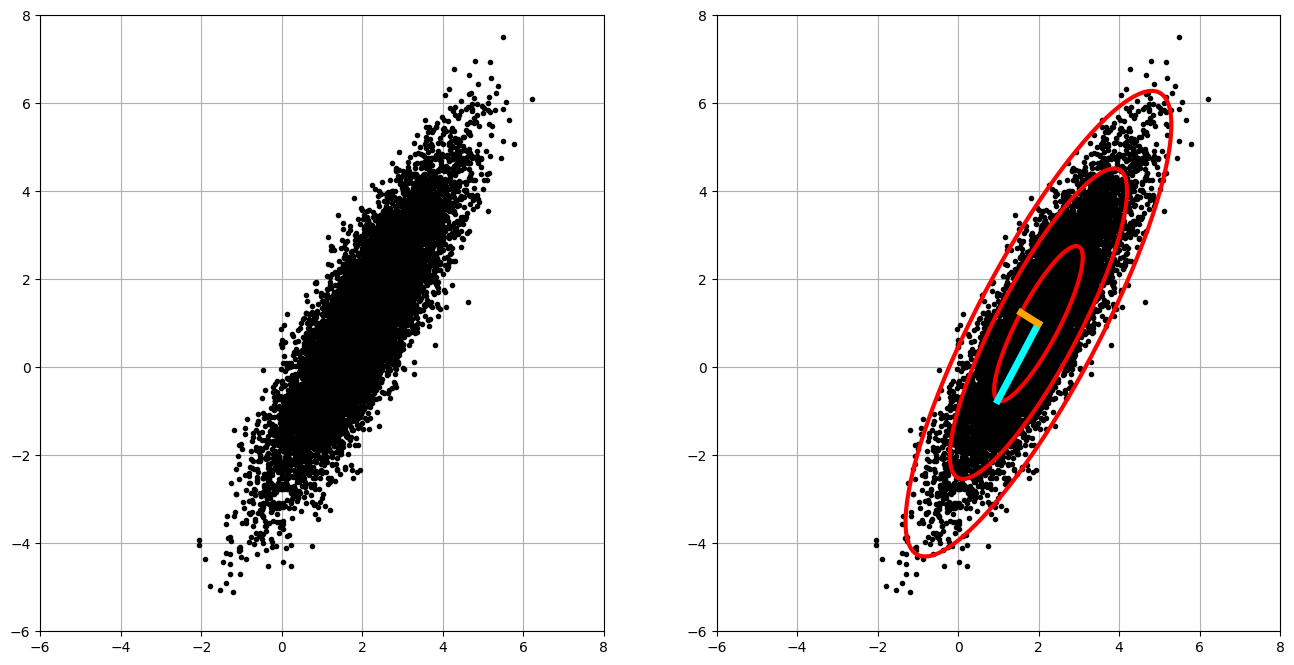

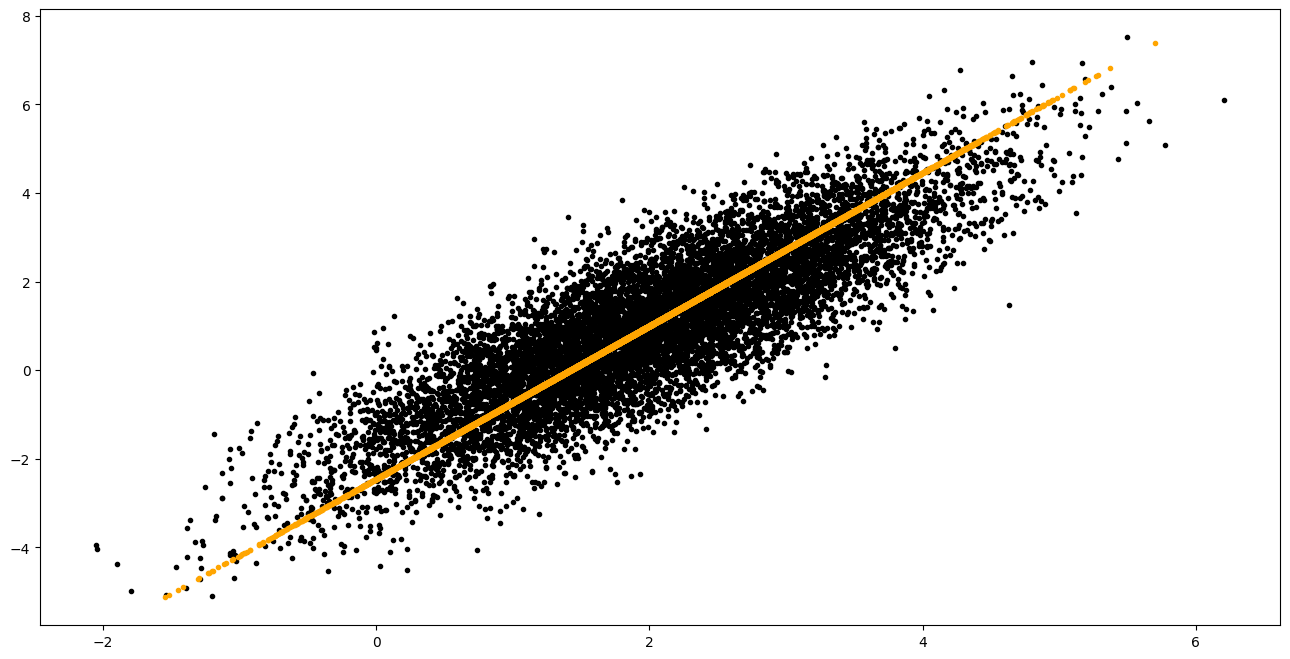

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=1)                  # Compute mean
Xmean = np.tile(Xavg,(nPoints,1)).T
B = X - Xmean        # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S)

circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = Xstd @ circle


ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='orange',linewidth=5)

plt.show()


# plt.plot(B[0,:],B[1,:], '.', color='k')
# plt.plot(X[0,:],X[1,:], '.', color='k')

X_recover = ((U @ np.diag(S))[:, :1] @ VT[:1]) * np.sqrt(nPoints)+ Xmean
# X_recover = ((U @ np.diag(S)) @ VT) * np.sqrt(nPoints) + Xmean
plt.plot(X[0,:],X[1,:], '.', color='k')
plt.plot(X_recover[0,:],X_recover[1,:], '.', color='orange')
plt.show()



In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

10000
tf.Tensor([1.9947258 1.0041463], shape=(2,), dtype=float32)
Xmean:  tf.Tensor(
[[1.9947258 1.0041463]
 [1.9947258 1.0041463]
 [1.9947258 1.0041463]
 ...
 [1.9947258 1.0041463]
 [1.9947258 1.0041463]
 [1.9947258 1.0041463]], shape=(10000, 2), dtype=float32)
--------------------------------------------------
tf.Tensor([1.979357   0.49786747], shape=(2,), dtype=float32)
tf.Tensor(
[[-0.00597169  0.00444874]
 [-0.00394141 -0.0106108 ]
 [-0.00336848 -0.00403951]
 ...
 [-0.00046082 -0.02080248]
 [-0.02030097 -0.00392227]
 [-0.02980342  0.03569834]], shape=(10000, 2), dtype=float32)
tf.Tensor(
[[-0.50081724 -0.8655531 ]
 [ 0.8655531  -0.50081724]], shape=(2, 2), dtype=float32)


(-6.0, 8.0)

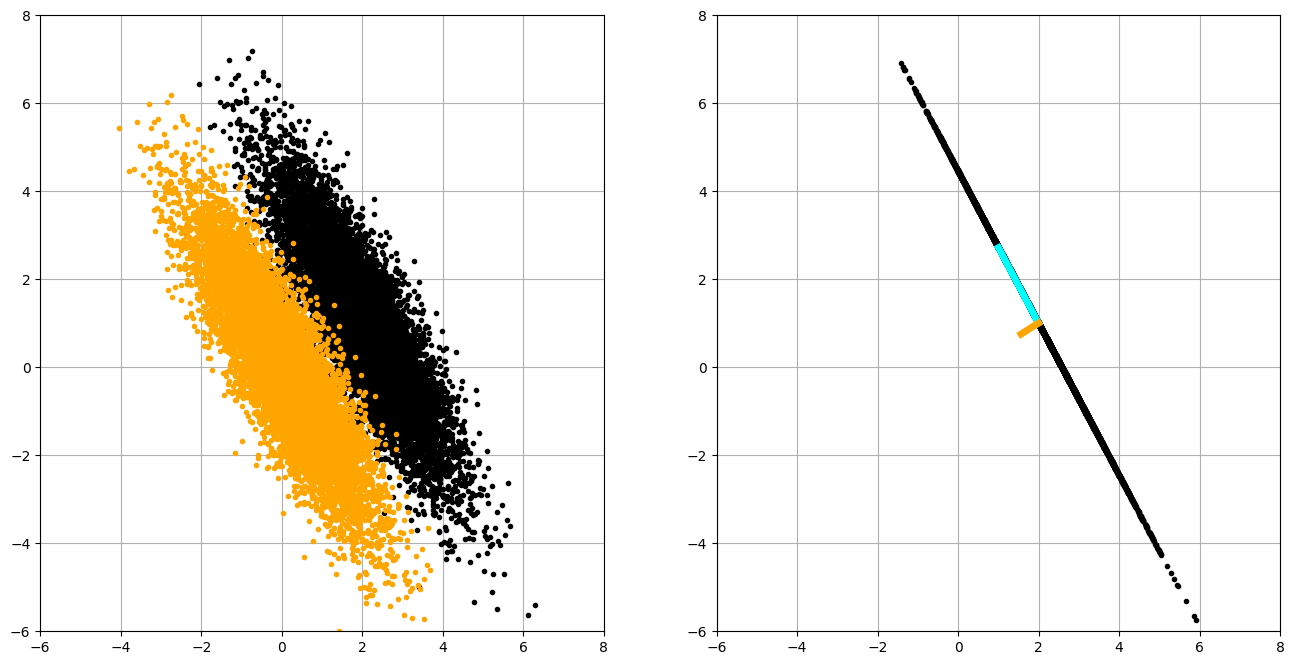

In [4]:

plt.rcParams['figure.figsize'] = [16, 8]

xC = tf.constant([2, 1], dtype=tf.float32)  # Center of data (mean)
sig = tf.constant([2, 0.5], dtype=tf.float32)  # Principal axes

# theta = tf.constant(math.pi, dtype=tf.float32) / 3  # Rotate cloud by pi/3
theta = tf.convert_to_tensor(math.pi / 3, dtype=tf.float32)  # Rotate cloud by pi/3
nPoints = 10000  # Create 10,000 points
print(nPoints)

R = tf.constant([[0.5, -0.8660254], [0.8660254, 0.5]])

randn = tf.random.normal(shape=(nPoints, 2), dtype=tf.float32)
X = randn @ (tf.linalg.diag(sig) @ R) +  tf.ones((nPoints, 2)) @ tf.linalg.diag(xC)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[:, 0], X[:, 1], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


Xavg = tf.reduce_mean(X, axis=0)  # Compute mean
print(Xavg)
Xmean = tf.tile(tf.expand_dims(Xavg, axis=0), [nPoints, 1])  # Mean-subtracted data
print("Xmean: ", Xmean)
B = X - Xmean

ax1.plot(B[:, 0], B[:, 1], '.', color='orange')

B_scaled = B / np.sqrt(nPoints)
# B_scaled = B / tf.sqrt(tf.constant(nPoints, dtype=tf.float32))
# B_scaled = tf.transpose(B_scaled)
# print("B_scaled shape: ", B_scaled.shape)
# Find principal components (SVD)
S, U, V = tf.linalg.svd(B_scaled, full_matrices=False)

print("-" * 50)
print(S)
print(U)
print(V)

# principle components
# pc = tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)
pc = tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)

# X_recover = (U @ tf.matmul(tf.linalg.diag(S), V[:1], adjoint_b=True)) * np.sqrt(nPoints) + Xmean
# X_recover = (U @ tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)) * np.sqrt(nPoints) + Xmean

X_recover = (U[:, :1] @ pc[:1, :]) * np.sqrt(nPoints) + Xmean
# X_recover = (U @ pc) * np.sqrt(nPoints) + Xmean
ax2 = fig.add_subplot(122)
# ax2.plot(X[:, 0], X[:, 1], '.', color='k')  # Plot data to overlay PCA
ax2.plot(X_recover[:, 0], X_recover[:, 1], '.', color='k')  # Plot data to overlay PCA


colors = ['cyan', 'orange']
for i, p in enumerate(pc):
    ax2.plot(np.array([Xavg[0], Xavg[0] + pc[i,0]]),
            np.array([Xavg[1], Xavg[1] + pc[i,1]]),'-',color=colors[i],linewidth=5)

ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

# print(X)
# print(X_recover)

3 dimensions

10000
(10000, 3)
tf.Tensor([1.9854543 1.0347915 0.7903759], shape=(3,), dtype=float32)
Singular values:  tf.Tensor([2.0864193  0.64512634 0.15054199], shape=(3,), dtype=float32)
Principal components:  tf.Tensor(
[[-1.0129905e+00  1.7034794e+00 -6.5203851e-01]
 [-4.4924638e-01 -3.7243372e-01 -2.7506170e-01]
 [ 7.9565898e-02 -1.5983556e-03 -1.2778735e-01]], shape=(3, 3), dtype=float32)
Reduced is:  tf.Tensor(
[[ 4.2366543  -3.9412384   2.2543097 ]
 [ 0.9164641   1.880756    0.11419535]
 [ 3.7016335   0.5382243   1.8651538 ]
 ...
 [ 4.2749643  -2.1792011   2.2561235 ]
 [ 2.6471164   1.0062705   1.2027118 ]
 [-0.17954183  3.8674824  -0.593075  ]], shape=(10000, 3), dtype=float32)
Original is:  tf.Tensor(
[[ 4.2246084  -3.9409757   2.2736526 ]
 [ 1.0282097   1.8785105  -0.065274  ]
 [ 3.678994    0.53867894  1.9015112 ]
 ...
 [ 4.4212084  -2.1821384   2.0212462 ]
 [ 2.6003776   1.0072094   1.277777  ]
 [-0.2342782   3.8685813  -0.5051649 ]], shape=(10000, 3), dtype=float32)
Delta is:  tf.Te

(-6.0, 8.0)

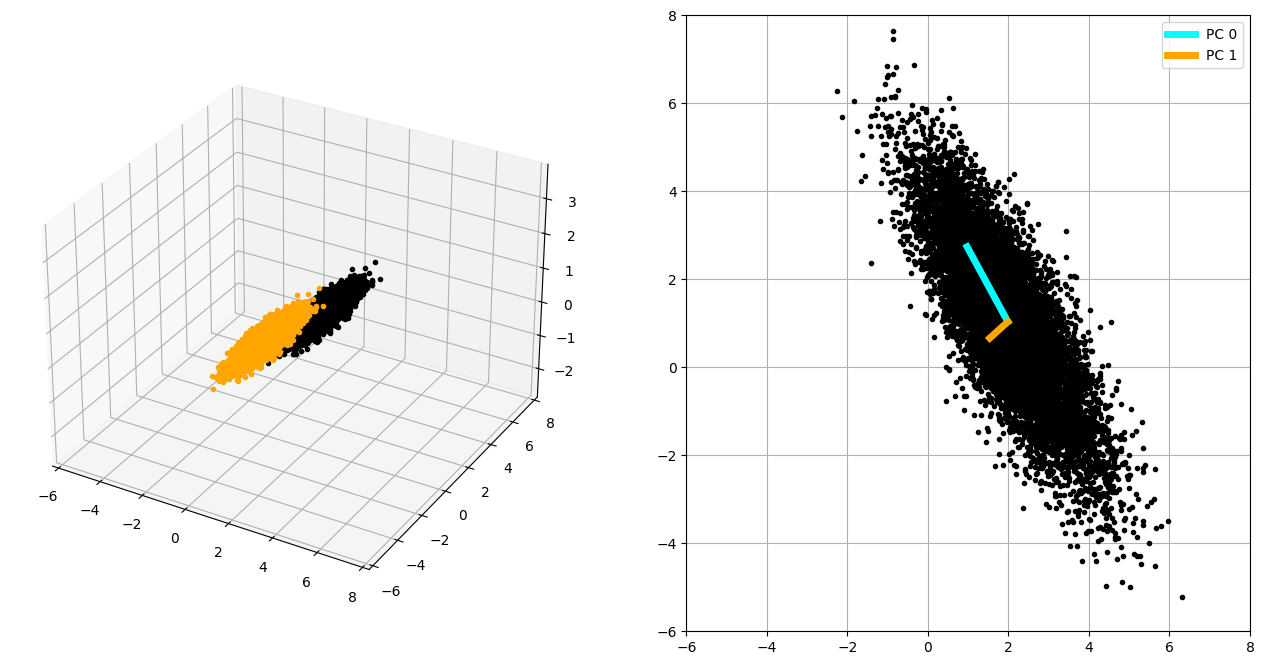

In [5]:
plt.rcParams['figure.figsize'] = [16, 8]

xC = tf.constant([2, 1, 0.8], dtype=tf.float32)  # Center of data (mean)
sig = tf.constant([2, 0.5, 0.3], dtype=tf.float32)  # Principal axes

# theta = tf.constant(math.pi, dtype=tf.float32) / 3  # Rotate cloud by pi/3
theta = tf.convert_to_tensor(math.pi / 3, dtype=tf.float32)  # Rotate cloud by pi/3
nPoints = 10000  # Create 10,000 points
print(nPoints)

R = tf.constant([[0.5, -0.8660254, 0.32], [0.8660254, 0.5, 0.32], [0.8660254, 0.5, 1]])

randn = tf.random.normal(shape=(nPoints, 3), dtype=tf.float32)
X = randn @ (tf.linalg.diag(sig) @ R) +  tf.ones((nPoints, 3)) @ tf.linalg.diag(xC)
print(X.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(X[:, 0], X[:, 1], X[:, 2],'.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

Xavg = tf.reduce_mean(X, axis=0)  # Compute mean
print(Xavg)
Xmean = tf.tile(tf.expand_dims(Xavg, axis=0), [nPoints, 1])  # Mean-subtracted data

B = X - Xmean

ax1.plot(B[:, 0], B[:, 1], B[:, 2], '.', color='orange')

B_scaled = B / np.sqrt(nPoints)
S, U, V = tf.linalg.svd(B_scaled, full_matrices=False)
print("Singular values: ", S)
pc = tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)
print("Principal components: ", pc)
k_dims = 2
pc = pc[:k_dims, :]
X_recover = (U[:, :k_dims] @ pc[:k_dims, :]) * np.sqrt(nPoints) + Xmean
print("Reduced is: ",  X_recover)
print("Original is: ", X)
print("Delta is: ", X_recover - X)
# X_recover = (U @ pc) * np.sqrt(nPoints) + Xmean
# ax2.plot(X[:, 0], X[:, 1], '.', color='k')  # Plot data to overlay PCA

is_3d = False
if is_3d:
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot(X_recover[:, 0], X_recover[:, 2], X_recover[:, 1],'.', color='k')  # Plot data to overlay PCA
else:
    ax2 = fig.add_subplot(122)
    ax2.plot(X_recover[:, 0], X_recover[:, 1],'.', color='k')  # Plot data to overlay PCA

error = tf.keras.metrics.MeanSquaredError()(X, X_recover)
print("Reconstruction error: ", error.numpy())
colors = ['cyan', 'orange', 'pink']
for i, p in enumerate(pc):
    print(f"PC {i}:", pc[i,0], pc[i,1], pc[i,2])
    if is_3d:
        ax2.plot(np.array([Xavg[0], Xavg[0] + p[0]]),
                np.array([Xavg[1], Xavg[1] + p[2]]),
                np.array([Xavg[2], Xavg[2] + p[1]]),
                '-',color=colors[i],linewidth=5, label=f"PC {i}")
    else:
        ax2.plot(np.array([Xavg[0], Xavg[0] + p[0]]),
                np.array([Xavg[1], Xavg[1] + p[1]]),
                '-',color=colors[i],linewidth=5, label=f"PC {i}")
 
ax2.grid()
ax2.legend()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


[0 3]


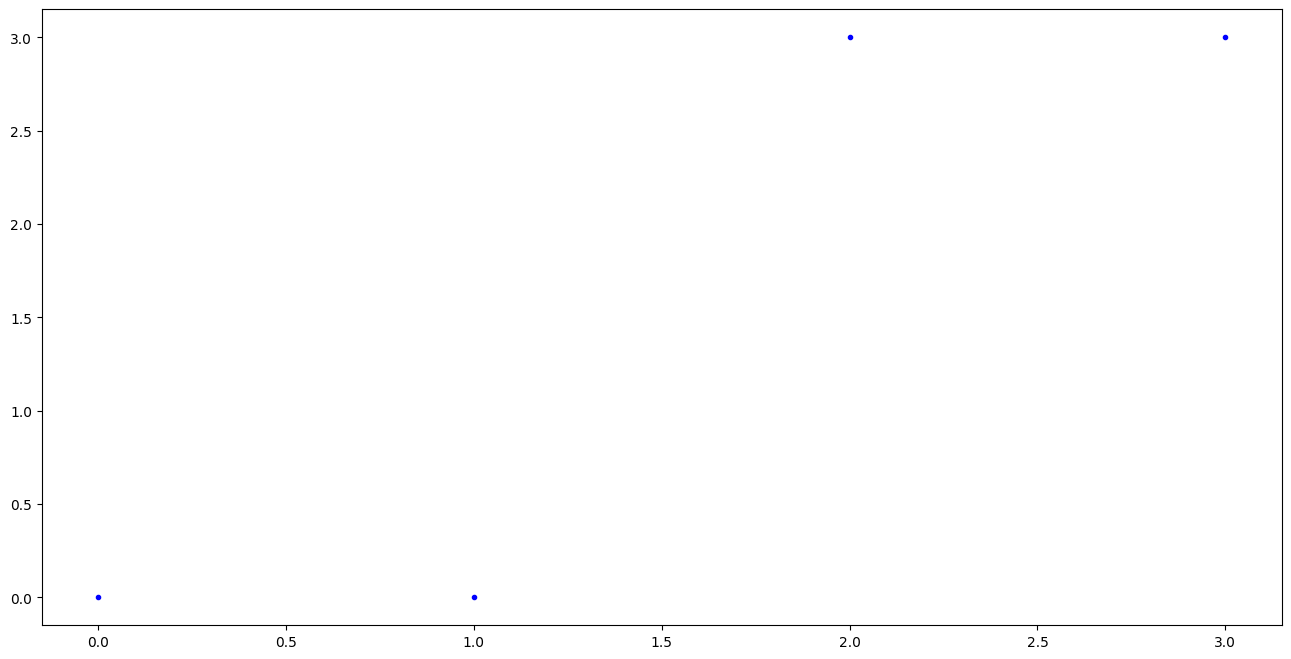

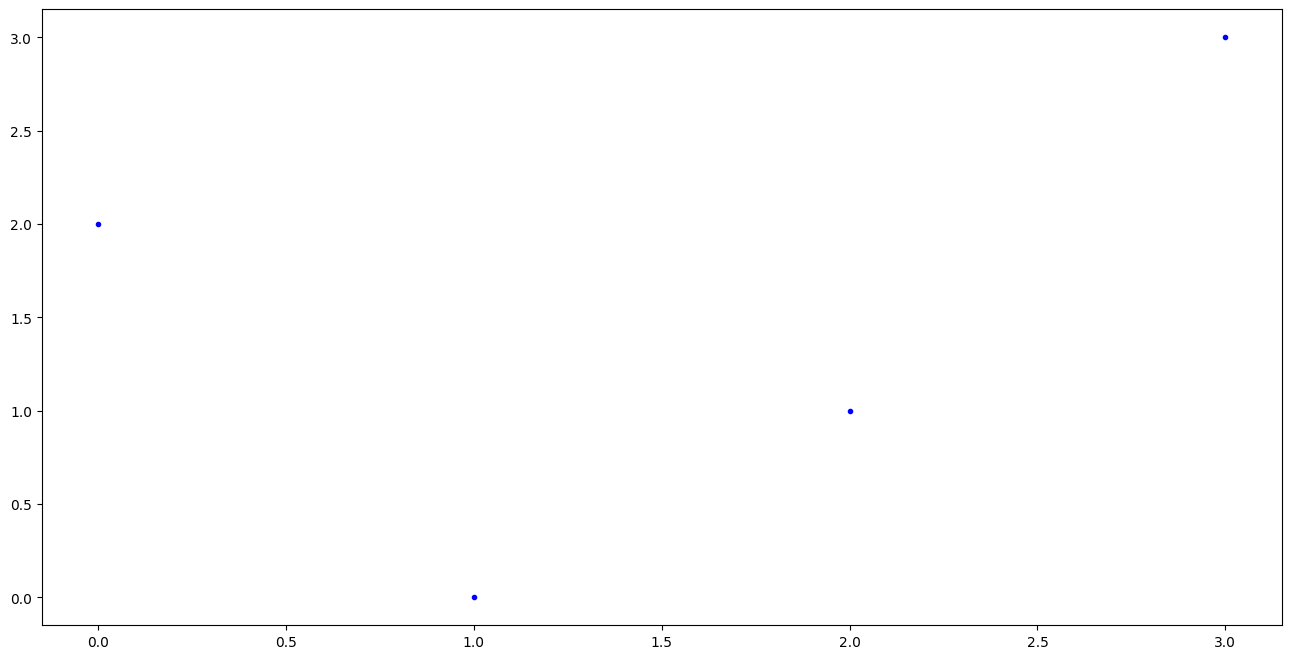

In [6]:
import matplotlib.pyplot as plt
import numpy as np


xs = np.array([[0, 1], [2, 3]])
ys = np.array([[2, 0], [1, 3]])

print(ys[:, 1])
plt.plot(xs, ys[:, 1], 'b.')
plt.show()

xs = np.array([0, 1, 2, 3])
ys = np.array([2, 0, 1, 3])

plt.plot(xs, ys, 'b.')
plt.show()


In [7]:

x = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32)

with tf.GradientTape() as t2:
    t2.watch(x)
    with tf.GradientTape() as tape, tf.GradientTape() as tape2:
        tape2.watch(x)
        tape.watch(x)
        y = x * x

    dy_dx = tape.batch_jacobian(y, x)
    print(dy_dx)

    # harvest the gradient:
    basis_vector = tf.eye(2, dtype=tf.float32)
    print("Gradient: ", dy_dx @ basis_vector)
    # dy_first = tf.matmul(dy_dx, tf.linalg.diag(tf.ones((2, 1), dtype=tf.float32)))

    dydx = tape2.gradient(y, x)
    print(dydx)

    # dy_dx = dy_dx @ tf.linalg.diag(tf.ones((2, 1), dtype=tf.float32))

ddyddx = t2.jacobian(dy_dx, x)
# print(x[:, 0])


print(dy_dx)
print(ddyddx)



tf.Tensor(
[[[ 2.  0.]
  [ 0.  4.]]

 [[ 6.  0.]
  [ 0.  8.]]

 [[10.  0.]
  [ 0. 12.]]], shape=(3, 2, 2), dtype=float32)
Gradient:  tf.Tensor(
[[[ 2.  0.]
  [ 0.  4.]]

 [[ 6.  0.]
  [ 0.  8.]]

 [[10.  0.]
  [ 0. 12.]]], shape=(3, 2, 2), dtype=float32)
tf.Tensor(
[[ 2.  4.]
 [ 6.  8.]
 [10. 12.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[[ 2.  0.]
  [ 0.  4.]]

 [[ 6.  0.]
  [ 0.  8.]]

 [[10.  0.]
  [ 0. 12.]]], shape=(3, 2, 2), dtype=float32)
tf.Tensor(
[[[[[2. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 2.]
    [0. 0.]
    [0. 0.]]]]



 [[[[0. 0.]
    [2. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 2.]
    [0. 0.]]]]



 [[[[0. 0.]
    [0. 0.]
    [2. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 2.]]]]], shape=(3, 2, 2, 3, 2), dtype=float32)


In [8]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap

In [9]:
def f(x):
    return x * x

x = jnp.array([[1, 2], [3, 4], [5, 6]], dtype=jnp.float32)

dydx = vmap(vmap(grad(f)))(x)
print(dydx)
# dy = vmap(grad(f))
# print(vmap(dy)(jnp.array([[1, 2, 3],[4, 5, 6]], dtype=jnp.float32)))

def value_and_jacrev(f, x):
    # Function that computes both the values and the Jacobian using reverse mode autodiff
    y, vjpfun = jax.vjp(f, x)  # Compute the values and obtain a VJP function
    basis = jnp.eye(y.size, dtype=y.dtype)
    jac = vmap(vjpfun)(basis)[0]  # Compute the Jacobian using the VJP function
    return y, jac, vjpfun

y, vjp_f = jax.vjp(f, x)
print(y)

seed = jnp.zeros((3, 2), dtype=jnp.float32)
seed = seed.at[-1, -1].set(1.0)
print(seed)

jac = vjp_f(seed)

print(jac)

print(vjp_f(jnp.ones((3, 2), dtype=jnp.float32)))

# print(jax.jacrev(f)(x))


def our_jacrev(f):
    def jacfun(x):
        y, vjp_fun = jax.vjp(f, x)
        # Use vmap to do a matrix-Jacobian product.
        # Here, the matrix is the Euclidean basis, so we get all
        # entries in the Jacobian at once. 
        J, = vmap(vjp_fun, in_axes=0)(jnp.eye(len(y)))
        return J
    return jacfun

# print(jax.jacrev(f)(x).shape)
# print(our_jacrev(f)(x))

dy, vjp_df = jax.vjp(vjp_f, jnp.ones(y.shape, dtype=jnp.float32))
print(dy)

jnp.dot(vmap(vmap(grad(f)))(x), jnp.array([[1, 0], [0, 1]], dtype=jnp.float32))

#jnp.eye(len(y), dtype=jnp.float32) @ 

# J = jax.jacobian(f)(x)
# print(J.shape)
# print(J)
# jnp.ones((1, 3), dtype=jnp.float32) @ J




[[ 2.  4.]
 [ 6.  8.]
 [10. 12.]]
[[ 1.  4.]
 [ 9. 16.]
 [25. 36.]]
[[0. 0.]
 [0. 0.]
 [0. 1.]]
(DeviceArray([[ 0.,  0.],
             [ 0.,  0.],
             [ 0., 12.]], dtype=float32),)
(DeviceArray([[ 2.,  4.],
             [ 6.,  8.],
             [10., 12.]], dtype=float32),)
(DeviceArray([[ 2.,  4.],
             [ 6.,  8.],
             [10., 12.]], dtype=float32),)


DeviceArray([[ 2.,  4.],
             [ 6.,  8.],
             [10., 12.]], dtype=float32)

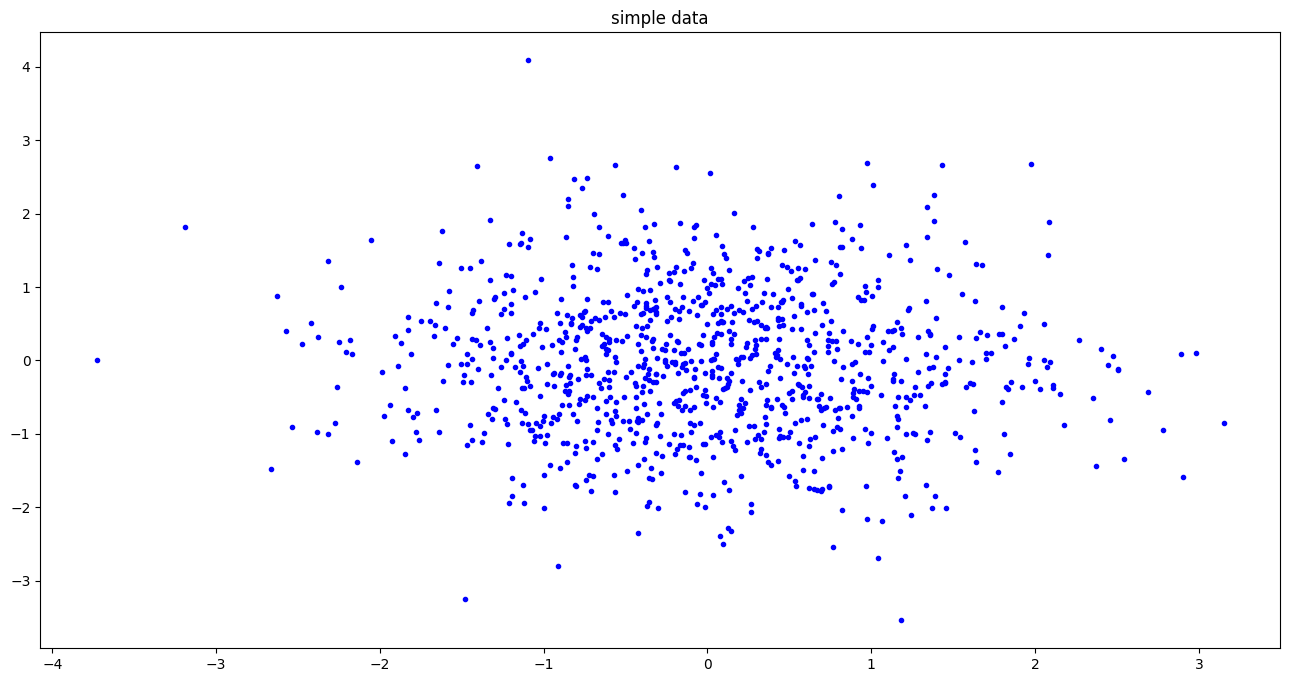

In [10]:
# plot data

key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
x = jax.random.normal(subkey, shape=(1000, 4))

plt.title("simple data")
plt.plot(x[:, 0], x[:, 1], 'b.')
plt.show()


In [11]:

print(x.shape)

print(x.ndim)

(1000, 4)
2


In [12]:
y, vjpfun = jax.vjp(f, x)
print(y)
print("y shape: ", y.shape)

vjpfun(jnp.ones_like(y))[0].shape

[[5.23176491e-02 8.54188800e-01 2.72714376e-01 1.22458108e-01]
 [3.88907902e-02 2.03721016e-03 9.49082136e-01 4.13755834e-01]
 [3.50323021e-02 1.44211209e+00 5.20091131e-03 1.13619715e-01]
 ...
 [3.81449819e-01 1.02171905e-01 3.01980376e-01 1.28893662e-04]
 [3.42053223e+00 1.41760051e-01 6.17123470e-02 4.09771800e-01]
 [5.93235970e-01 6.01238571e-04 1.06698608e+00 5.99933481e+00]]
y shape:  (1000, 4)


(1000, 4)

In [13]:

# basis = jnp.eye(y.size, dtype=y.dtype)
# print(basis.shape)
# jac = vmap(vjpfun)(basis)[0]  # Compute the Jacobian using the VJP function

# print(x.shape)

# vmap(vmap(vjpfun))(basis)

print(jax.jacrev(f)(x).shape)

print(type(y))
v, = vjpfun(jnp.ones_like(y, dtype=jnp.float32))
print(v.shape)

basis = jnp.eye(y.size, dtype=y.dtype)
# print(basis.shape)


leaves, _ = jax.tree_util.tree_flatten(y)
print(y.shape)

for leave in leaves:
    print(leave.shape)

# jax.tree_util.tree_unflatten(jax.tree_util.tree_structure(y), basis)
print(jax.tree_util.tree_structure(y))
print(jax.tree_util.tree_structure(leaves))

ndim = sum(map(np.size, leaves))
dtype= jax.dtypes.result_type(*leaves)
flat_basis = jnp.eye(ndim, dtype=dtype)
print(flat_basis.shape)
print(flat_basis)
print(jax.tree_util.tree_structure(flat_basis))

leaves, treedef = jax.tree_util.tree_flatten(y)
axis = 1
arr = flat_basis
axis = axis % arr.ndim
shapes = [arr.shape[:axis] + np.shape(l) + arr.shape[axis+1:] for l in leaves]
# parts = arr.split(np.cumsum(map(np.size, leaves[:-1])), axis)
# reshaped_parts = [ np.reshape(x, shape) for x, shape, leaf in zip(parts, shapes, leaves)]


# return tree_unflatten(treedef, reshaped_parts)

# res = jax.tree_util.tree_unflatten()








#   leaves, _ = tree_flatten(pytree)
#   ndim = sum(map(np.size, leaves))
#   dtype = dtypes.result_type(*leaves)
#   flat_basis = jax.numpy.eye(ndim, dtype=dtype)
#   return _unravel_array_into_pytree(pytree, 1, None, flat_basis)



: 

: 

jax pca

[[ 1.0057467   1.749878  ]
 [ 0.43769276 -0.251565  ]]
x_base:  2.0102432 y_base:  1.0179284
x:  3.0159898 y:  2.7678065
x_base:  2.0102432 y_base:  1.0179284
x:  2.447936 y:  0.7663634


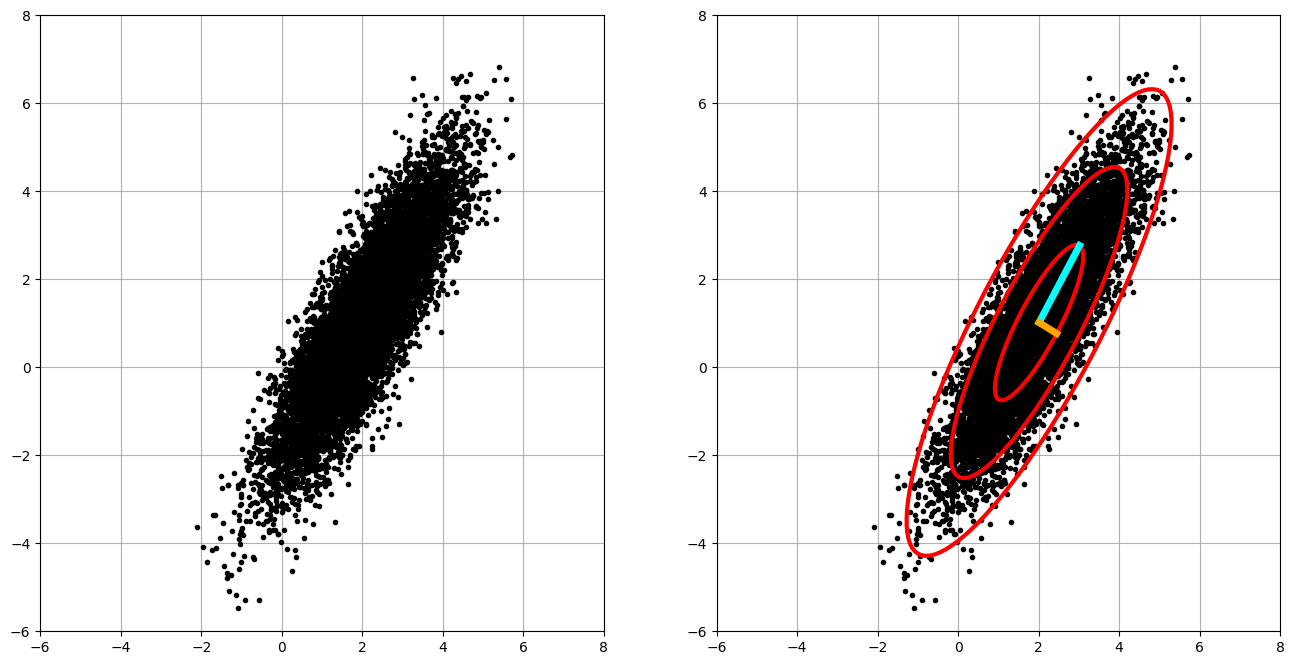

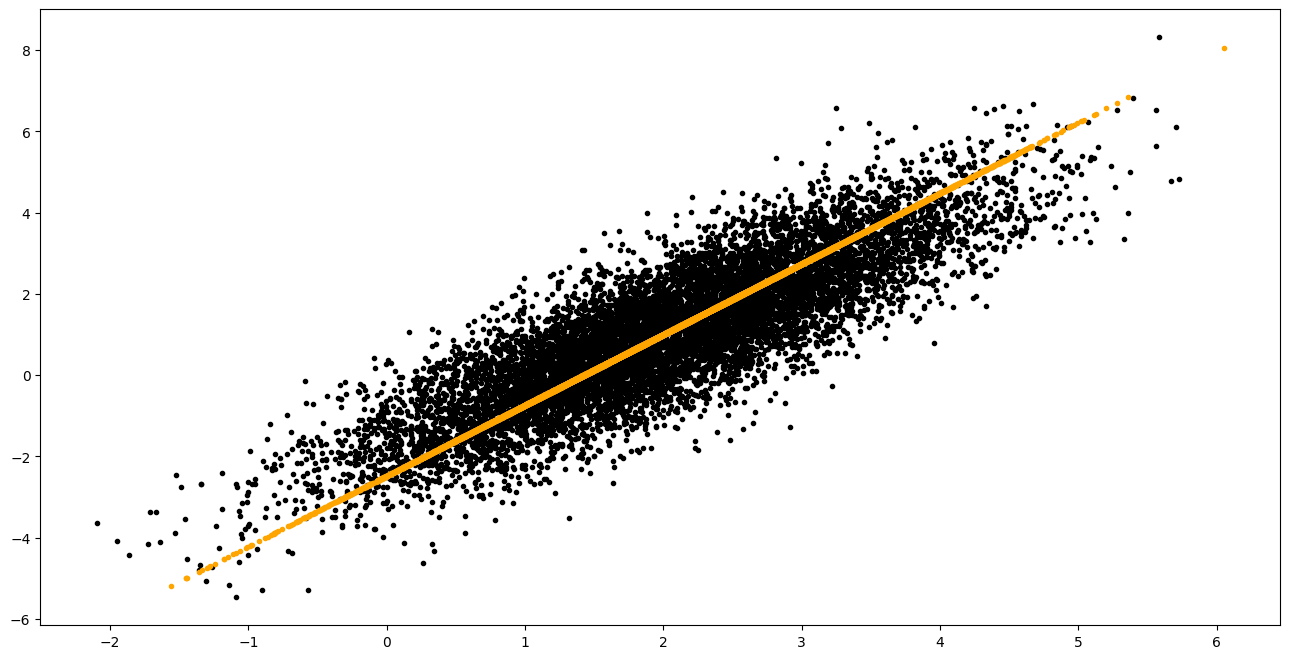

In [5]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points

key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)

X = jax.random.normal(subkey, shape=(nPoints, 2)) @ (np.diag(sig) @ R.T) + np.ones((nPoints, 2)) @ np.diag(xC)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[:,0],X[:,1], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=0)                  # Compute mean
Xmean = np.tile(Xavg,(nPoints, 1))
B = X - Xmean        # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[:,0],X[:,1], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))


pc = np.diag(S) @ VT
print(pc)


# 1-std confidence interval
theta = 2 * np.pi * np.arange(0,1,0.01)
circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = (pc.T @ circle).T

ax2.plot(Xavg[0] +   Xstd[:,0], Xavg[1]  +  Xstd[:,1],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[:,0], Xavg[1] + 2*Xstd[:,1],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[:,0], Xavg[1] + 3*Xstd[:,1],'-',color='r',linewidth=3)

colors = ['cyan', 'orange']
for i, p in enumerate(pc):
    print("x_base: ", Xavg[0], "y_base: ", Xavg[1])
    print("x: ", Xavg[0] + pc[i,0], "y: ", Xavg[1] + pc[i,1])
    ax2.plot(np.array([Xavg[0], Xavg[0] + pc[i,0]]),
             np.array([Xavg[1], Xavg[1] + pc[i,1]]),'-',color=colors[i],linewidth=5)

plt.show()


X_recover = (U[:, :1] @ pc[:1, :]) * np.sqrt(nPoints)+ Xmean
plt.plot(X[:,0],X[:,1], '.', color='k')
plt.plot(X_recover[:,0],X_recover[:,1], '.', color='orange')
plt.show()

(10000, 2)
[[ 35.984898   8.331627]
 [ 32.71531   30.83884 ]
 [ 37.668518 -23.491798]
 ...
 [ 13.069952 -14.077689]
 [ 48.273582  13.133987]
 [ 30.175934 -11.869325]]
[[ 35.984898   8.331627]
 [ 32.71531   30.83884 ]
 [ 37.668518 -23.491798]
 ...
 [ 13.069952 -14.077689]
 [ 48.273582  13.133987]
 [ 30.175934 -11.869325]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
y0_base:  5.2441792 y1_base:  4.1615353
y0:  9.410303 y1:  9.533779
y0_base:  5.2441792 y1_base:  4.1615353
y0:  7.4620457 y1:  2.4416013
[[ 1.0057467   1.749878  ]
 [ 0.43769276 -0.251565  ]]
x_base:  2.0102432 y_base:  1.0179284
x:  3.0159898 y:  2.7678065
x_base:  2.0102432 y_base:  1.0179284
x:  2.447936 y:  0.7663634


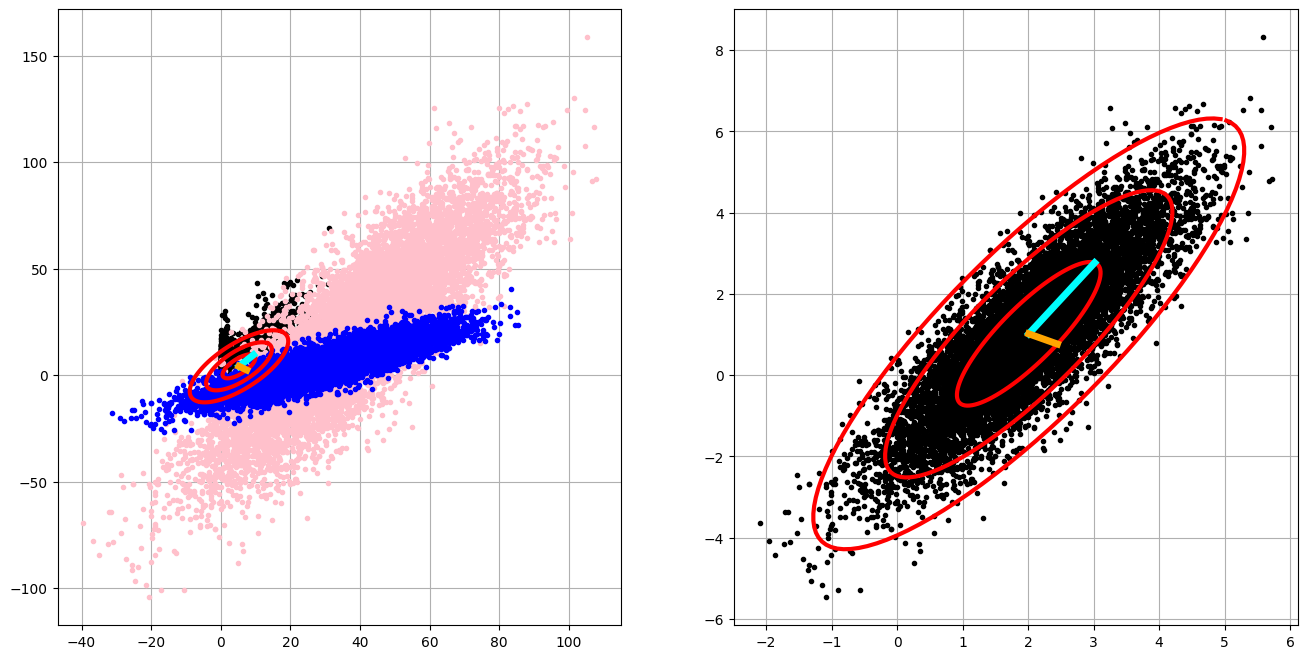

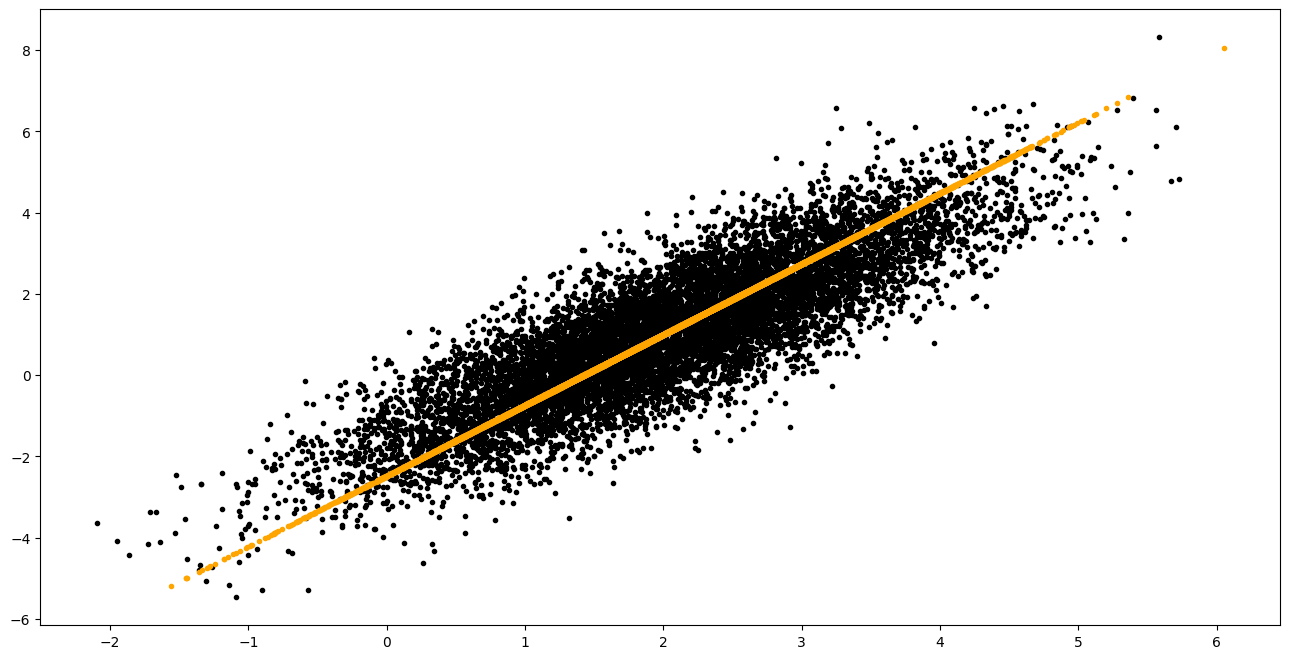

In [93]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as np

def f(x):
    return x**2

plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points

key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)

X = jax.random.normal(subkey, shape=(nPoints, 2)) @ (np.diag(sig) @ R.T) + np.ones((nPoints, 2)) @ np.diag(xC)

y, vjp_fun = jax.vjp(f, X)
print(y.shape)
Yavg = np.mean(y,axis=0)                  # Compute mean
Ymean = np.tile(Yavg,(nPoints, 1))

U, S, VT = np.linalg.svd((y - Ymean)/np.sqrt(nPoints),full_matrices=False)
pc = np.diag(S) @ VT

scaled_pc = Yavg + pc

direction_one = np.tile(scaled_pc[0], (nPoints, 1))
direction_two = np.tile(scaled_pc[1], (nPoints, 1))

dydx_one = vjp_fun(direction_one)[0]
print(dydx_one)
dydx_two = vjp_fun(direction_two)[0]

dydx, vjp_ff = jax.vjp(vjp_fun, direction_one)
print(dydx[0])

assert(np.allclose(dydx[0], dydx_one))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(y[:, 0], y[:, 1], '.', color='k')
ax1.plot(dydx_one[:, 0], dydx_one[:, 1], '.', color='pink')
ax1.plot(dydx_two[:, 0], dydx_two[:, 1], '.', color='blue')
theta = 2 * np.pi * np.arange(0,1,0.01)
circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Ystd = (pc.T @ circle).T

ax1.plot(Yavg[0] +   Ystd[:,0], Yavg[1]  +  Ystd[:,1],'-',color='r',linewidth=3)
ax1.plot(Yavg[0] + 2*Ystd[:,0], Yavg[1] + 2*Ystd[:,1],'-',color='r',linewidth=3)
ax1.plot(Yavg[0] + 3*Ystd[:,0], Yavg[1] + 3*Ystd[:,1],'-',color='r',linewidth=3)

colors = ['cyan', 'orange']
for i, p in enumerate(pc):
    print("y0_base: ", Yavg[0], "y1_base: ", Yavg[1])
    print("y0: ", Yavg[0] + pc[i,0], "y1: ", Yavg[1] + pc[i,1])
    ax1.plot(np.array([Yavg[0], Yavg[0] + pc[i,0]]),
             np.array([Yavg[1], Yavg[1] + pc[i,1]]),'-',color=colors[i],linewidth=5)



ax1.grid()

Xavg = np.mean(X,axis=0)                  # Compute mean
Xmean = np.tile(Xavg,(nPoints, 1))
B = X - Xmean        # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[:,0],X[:,1], '.', color='k')   # Plot data to overlay PCA
ax2.grid()

pc = np.diag(S) @ VT
print(pc)


# 1-std confidence interval
theta = 2 * np.pi * np.arange(0,1,0.01)
circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = (pc.T @ circle).T

ax2.plot(Xavg[0] +   Xstd[:,0], Xavg[1]  +  Xstd[:,1],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[:,0], Xavg[1] + 2*Xstd[:,1],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[:,0], Xavg[1] + 3*Xstd[:,1],'-',color='r',linewidth=3)

colors = ['cyan', 'orange']
for i, p in enumerate(pc):
    print("x_base: ", Xavg[0], "y_base: ", Xavg[1])
    print("x: ", Xavg[0] + pc[i,0], "y: ", Xavg[1] + pc[i,1])
    ax2.plot(np.array([Xavg[0], Xavg[0] + pc[i,0]]),
             np.array([Xavg[1], Xavg[1] + pc[i,1]]),'-',color=colors[i],linewidth=5)

plt.show()


X_recover = (U[:, :1] @ pc[:1, :]) * np.sqrt(nPoints)+ Xmean
plt.plot(X[:,0],X[:,1], '.', color='k')
plt.plot(X_recover[:,0],X_recover[:,1], '.', color='orange')
plt.show()